In [1]:
# !pip install ipykernel
# !python -m ipykernel install --user 

In [2]:
# !pip list

In [3]:
# !pip install tensorflow==2.7

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [5]:
batch = 32
img_height = 180
img_width = 180

train_path = './currency/Train'
test_path = './currency/Test'

In [6]:
# import PIL, pathlib
# train_path = pathlib.Path(train_path)
# onehundred = list(train_path.glob('1Hundrednote/*'))
# PIL.Image.open(str(onehundred[5]))

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch
)

Found 153 files belonging to 7 classes.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
#  validation_split=0.1,
 # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)

Found 42 files belonging to 7 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['1Hundrednote', '2Hundrednote', '2Thousandnote', '5Hundrednote', 'Fiftynote', 'Tennote', 'Twentynote']


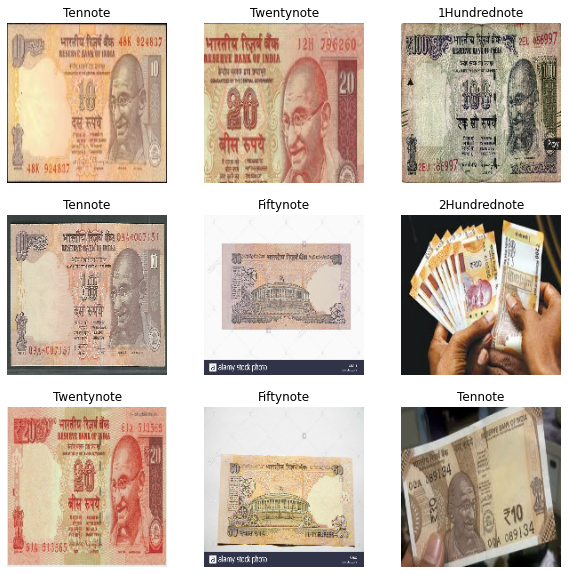

In [10]:
#Data Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
#normalize data by using a rescaling layer

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0072503127 1.0


In [13]:
Classifier=Sequential()

Classifier.add(layers.experimental.preprocessing.Rescaling(1./255,
      input_shape=(img_height, img_width, 3)))

Classifier.add(Conv2D(32,(3,3),
                      input_shape=(img_height,img_width,3), 
                      activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [14]:
Classifier.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 59168)             0

In [16]:
from PIL import _imaging
from PIL import Image
#fit the classifier
epochs = 50
r = Classifier.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
)

Epoch 1/50


C:\Users\NAMAN\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 4s 644ms/step - loss: 4.8952 - accuracy: 0.2026 - val_loss: 2.2769 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 3s 633ms/step - loss: 2.0900 - accuracy: 0.2092 - val_loss: 1.8987 - val_accuracy: 0.1905
Epoch 3/50
5/5 [==============================] - 3s 648ms/step - loss: 1.7524 - accuracy: 0.3791 - val_loss: 1.6865 - val_accuracy: 0.3333
Epoch 4/50
5/5 [==============================] - 4s 655ms/step - loss: 1.4921 - accuracy: 0.5294 - val_loss: 1.4814 - val_accuracy: 0.4048
Epoch 5/50
5/5 [==============================] - 4s 672ms/step - loss: 1.2296 - accuracy: 0.6405 - val_loss: 1.3400 - val_accuracy: 0.3571
Epoch 6/50
5/5 [==============================] - 3s 644ms/step - loss: 1.0195 - accuracy: 0.6667 - val_loss: 1.3869 - val_accuracy: 0.4048
Epoch 7/50
5/5 [==============================] - 3s 645ms/step - loss: 0.8327 - accuracy: 0.7255 - val_loss: 1.1307 - val_accuracy: 0.5238
Epoch 8/50
5/5 [===============

In [17]:
mean_val = (sum(r.history['val_accuracy']))/(len(r.history['val_accuracy']))
print('mean_test_accuracy: ', mean_val)

mean_test_accuracy:  0.6290476197004318


In [18]:
mean_train = (sum(r.history['accuracy']))/(len(r.history['accuracy']))
print('mean_train_accuracy: ', mean_train)

mean_train_accuracy:  0.9152941203117371


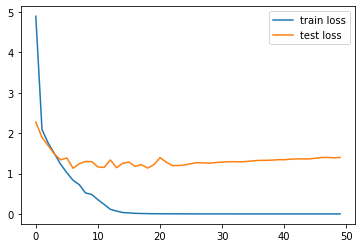

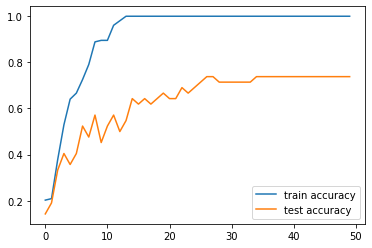

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

In [20]:
#Data Augmentation to reduce overfitting

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [21]:
Classifier=Sequential()

Classifier.add(data_augmentation)
Classifier.add(layers.experimental.preprocessing.Rescaling(1./255,
      input_shape=(img_height, img_width, 3)))

Classifier.add(Conv2D(32,(3,3),
                      input_shape=(img_height,img_width,3), 
                      activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(layers.Dropout(0.2))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [22]:
Classifier.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [23]:
Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

In [24]:
epochs = 50
r = Classifier.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50
5/5 [==============================] - 7s 1s/step - loss: 7.1369 - accuracy: 0.0980 - val_loss: 3.4218 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 2.3081 - accuracy: 0.1503 - val_loss: 1.9782 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 1.9442 - accuracy: 0.2026 - val_loss: 1.9286 - val_accuracy: 0.1905
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 1.8808 - accuracy: 0.2157 - val_loss: 1.7998 - val_accuracy: 0.1429
Epoch 5/50
5/5 [==============================] - 5s 955ms/step - loss: 1.7229 - accuracy: 0.2810 - val_loss: 1.5567 - val_accuracy: 0.3571
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.5719 - accuracy: 0.3529 - val_loss: 1.3833 - val_accuracy: 0.3571
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 1.4782 - accuracy: 0.3987 - val_loss: 1.3019 - val_accuracy: 0.4048
Epoch 8/50
5/5 [======================

In [25]:
mean_val = (sum(r.history['val_accuracy']))/(len(r.history['val_accuracy']))
print('mean_test_accuracy: ', mean_val)
print('\n')
mean_train = (sum(r.history['accuracy']))/(len(r.history['accuracy']))
print('mean_train_accuracy: ', mean_train)

mean_test_accuracy:  0.5466666740179061


mean_train_accuracy:  0.7432679830491543


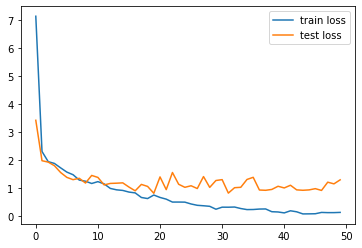

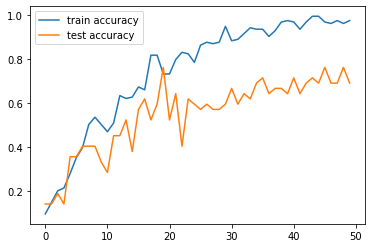

In [26]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

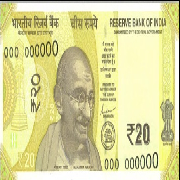

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('20rs.jpg',
                       target_size=(img_height,img_width))
img

In [30]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(Classifier.predict(test_image), axis=1)
result

array([6], dtype=int64)

In [31]:
prediction = class_names[result[0]]
prediction

'Twentynote'

In [32]:
from tensorflow.keras.models import load_model

Classifier.save('currency_Classifier.h5')

In [ ]:
# model=load_model('model_Classifier.h5')